## 24일차 강의 (2021.8.5)
# 머신러닝

### 확인 문제
1. 주성분분석(PCA) 를 설명한 것중 잘 못 된것은?
- 새로운 축을 잡아 변환하는 것이다
- 분산이 가장 큰 방향을 첫번째 주성분으로 한다.
- 모든 주성분이 똑같이 중요하다
- 속성의 갯수를 줄여주는 데 활용된다

2. 행복 데이터에서 6개의 속성을 골라내어 주성분 분석을 적용했다. 주성분은 몇개가 나오는가? 그리고 변환 결과인 pca.components_ 의 모양은 어떻게 되는가?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### MNIST 주성분분석

In [2]:
from sklearn.datasets import load_digits

In [3]:
mnist = load_digits()
mnist.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [6]:
mnist.data.shape, mnist.images.shape

((1797, 64), (1797, 8, 8))

Text(0.5, 1.0, '4')

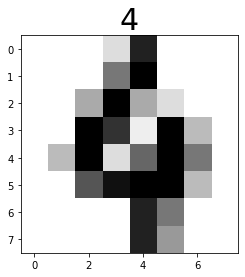

In [10]:
plt.imshow(mnist.data[100].reshape(8,8), cmap='gray_r', vmin=0, vmax=15)
plt.title(mnist.target[100], fontsize=30)

In [11]:
from sklearn.decomposition import PCA

In [12]:
pca = PCA()
pca.fit(mnist.data)

PCA()

In [13]:
pca.components_.shape

(64, 64)

In [50]:
pca1 = pca.components_[0]
pca1.round(2)

array([-0.  , -0.02, -0.22, -0.14, -0.03, -0.1 , -0.01,  0.  , -0.  ,
       -0.12, -0.24,  0.15, -0.05, -0.22, -0.01,  0.  , -0.  , -0.08,
        0.08,  0.22, -0.17, -0.16,  0.03,  0.  ,  0.  ,  0.06,  0.25,
       -0.04, -0.21, -0.04,  0.05,  0.  , -0.  ,  0.16,  0.37,  0.16,
        0.09,  0.04,  0.02, -0.  ,  0.  ,  0.11,  0.3 ,  0.25,  0.21,
        0.01, -0.04,  0.  ,  0.  , -0.01, -0.06,  0.09,  0.11, -0.14,
       -0.06,  0.  ,  0.  , -0.01, -0.24, -0.14, -0.01, -0.09, -0.04,
       -0.01])

In [23]:
pca1 = pca.components_[0]
pca1.round(2)
pca2 = pca.components_[1]
pca2.round(2)
pca3 = pca.components_[2]
pca3.round(2)

array([-0.  ,  0.02,  0.13,  0.13, -0.13, -0.26, -0.12, -0.02,  0.  ,
        0.08,  0.09,  0.07, -0.  , -0.28, -0.16, -0.02,  0.  ,  0.04,
        0.  ,  0.07,  0.1 , -0.31, -0.15, -0.01,  0.  , -0.04, -0.07,
        0.07, -0.01, -0.35, -0.15, -0.  , -0.  , -0.05, -0.03,  0.14,
        0.02, -0.26, -0.09, -0.  , -0.  , -0.02,  0.12,  0.17, -0.09,
       -0.14,  0.07,  0.  , -0.  ,  0.02,  0.23,  0.17, -0.05,  0.08,
        0.22,  0.02, -0.  ,  0.02,  0.12,  0.1 ,  0.14,  0.23,  0.17,
        0.03])

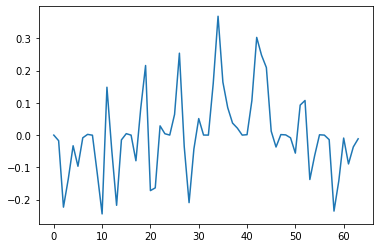

In [24]:
plt.plot(pca1)

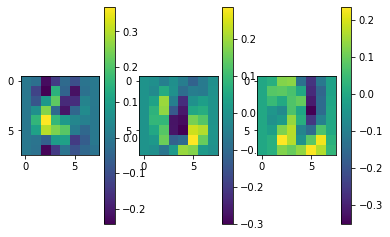

In [25]:
plt.subplot(1,3,1)
plt.imshow(pca1.reshape(8,8))
plt.colorbar()
plt.subplot(1,3,2)
plt.imshow(pca2.reshape(8,8))
plt.colorbar()
plt.subplot(1,3,3)
plt.imshow(pca3.reshape(8,8))
plt.colorbar()

In [15]:
pca2 = pca.components_[1]
pca2.round(2)

array([ 0.  , -0.01, -0.05, -0.01, -0.05, -0.12, -0.06, -0.01, -0.  ,
       -0.02,  0.06, -0.01, -0.09, -0.05, -0.06, -0.  , -0.  ,  0.04,
        0.2 , -0.05, -0.23, -0.  ,  0.03, -0.  , -0.  ,  0.08,  0.19,
       -0.14, -0.26,  0.05,  0.07,  0.  , -0.  ,  0.09,  0.09, -0.27,
       -0.29,  0.17,  0.13, -0.  ,  0.  ,  0.05,  0.13, -0.27, -0.3 ,
        0.24,  0.22,  0.  ,  0.  ,  0.01,  0.15, -0.12, -0.1 ,  0.29,
        0.15,  0.  , -0.  , -0.01, -0.07,  0.02,  0.19,  0.18,  0.02,
       -0.01])

In [26]:
X_pca = pca.transform(mnist.data)

In [27]:
X_pca.shape

(1797, 64)

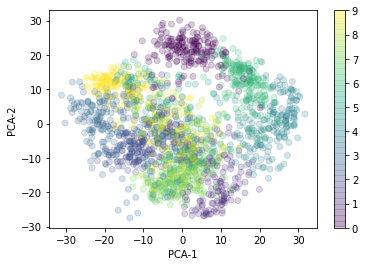

In [33]:
plt.scatter(X_pca[:,0], X_pca[:,1], c=mnist.target, alpha=0.2)
plt.xlabel('PCA-1')
plt.ylabel('PCA-2')
plt.colorbar()

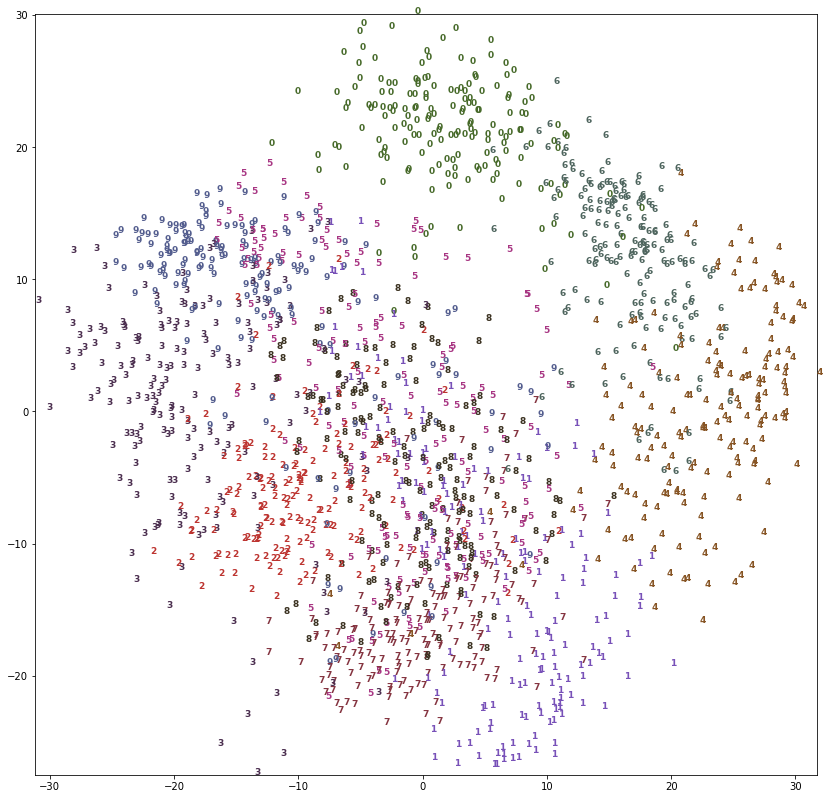

In [34]:
xmax, ymax = X_pca[:,:2].max(axis=0)
xmin, ymin = X_pca[:,:2].min(axis=0)

colors = ["#476A2A", "#7851B8", "#BD3430", "#4A2D4E", "#875525",
          "#A83683", "#4E655E", "#853541", "#3A3120", "#535D8E"]

plt.figure(figsize=[14,14])
plt.xlim([xmin,xmax])
plt.ylim([ymin,ymax])
for i in range(len(X_pca)):
    plt.text(X_pca[i,0], X_pca[i,1], str(mnist.target[i]),
             color=colors[mnist.target[i]], fontdict={'weight':'bold', 'size':9})

### PCA를 이용한 이미지 복원

In [48]:
recovered = np.matmul(X_pca[:,:2], pca.components_[:2])

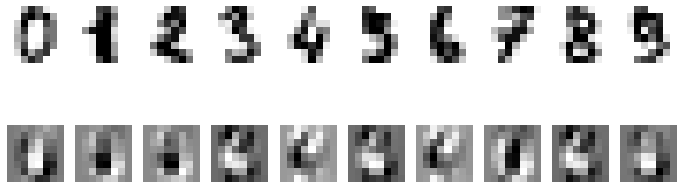

In [49]:
plt.figure(figsize=[12,4])
for i in range(10):
    plt.subplot(2,10,i+1)
    plt.imshow(mnist.images[i], cmap='gray_r')
    plt.axis('off')

    plt.subplot(2,10,10+i+1)
    plt.imshow(recovered[i].reshape(8,8), cmap='gray_r')
    plt.axis('off')

### 로지스틱 회귀

In [55]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [52]:
from sklearn.linear_model import LogisticRegression

In [57]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(cancer.data, cancer.target)

C:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [58]:
model.coef_ # 가중치(w)

array([[ 0.95307004,  0.40265702,  0.24669598, -0.01650922, -0.03591969,
        -0.1680544 , -0.23531476, -0.09931437, -0.0497894 , -0.00992008,
         0.04110012,  0.38738441,  0.15211808, -0.11599545, -0.00325826,
        -0.03581292, -0.05003393, -0.01290829, -0.01202424, -0.0033252 ,
         1.01136708, -0.46840197, -0.21945329, -0.01348183, -0.06505478,
        -0.52277523, -0.65074182, -0.19086394, -0.15759728, -0.05035951]])

In [59]:
model.intercept_ # 절편값(b)

array([0.17847105])

In [61]:
model.predict(cancer.data)

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,

In [63]:
model.predict_proba(cancer.data).round(2)

array([[1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       ...,
       [0.99, 0.01],
       [1.  , 0.  ],
       [0.03, 0.97]])

In [65]:
model.score(cancer.data, cancer.target)

0.945518453427065